In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load random data (replace with your dataset)
# Here, we use a randomly generated dataset for demonstration
data = np.random.rand(100, 5)  # 100 samples, 5 features
df = pd.DataFrame(data, columns=[f"Feature_{i+1}" for i in range(data.shape[1])])

In [3]:
# Step 3: Data Preprocessing
# Feature scaling (standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [4]:
# Step 4: Train-Test Split
X_train, X_test = train_test_split(scaled_data, test_size=0.2, random_state=42)

In [6]:
# Step 5: Train Base Model (Hierarchical Clustering)
# Using Agglomerative Clustering as the hierarchical clustering model
# When using 'ward' linkage, 'affinity' is not needed, as it assumes 'euclidean'
hierarchical_model = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the model on training data
hierarchical_model.fit(X_train)

AgglomerativeClustering(n_clusters=3)

Silhouette Score on Training Data: 0.14980568191630336


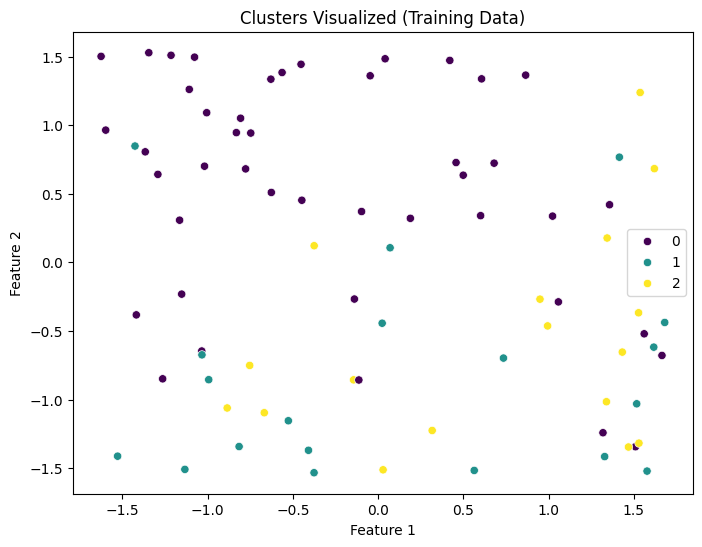

In [7]:
# Step 6: Evaluate the model
# Since it's unsupervised, use Silhouette Score to evaluate clustering quality
sil_score_train = silhouette_score(X_train, hierarchical_model.labels_)
print(f"Silhouette Score on Training Data: {sil_score_train}")

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=hierarchical_model.labels_, palette="viridis")
plt.title("Clusters Visualized (Training Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

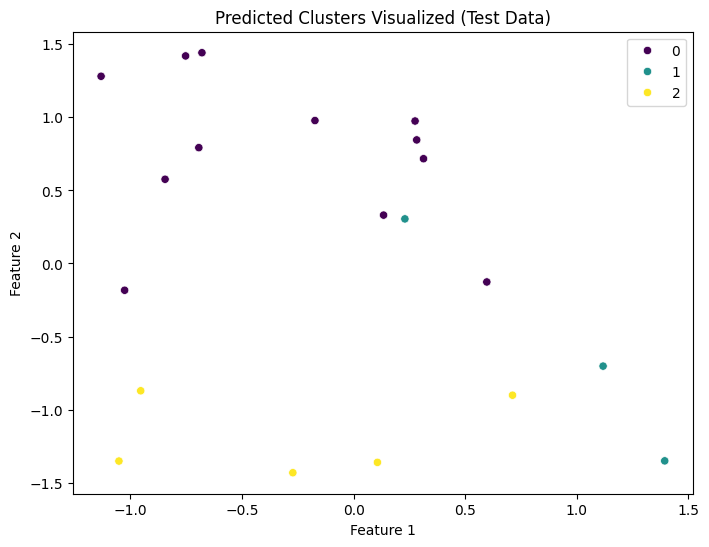

Predicted labels for new data (Test set): [2 1 0 0 0 1 0 0 2 0 0 0 2 0 0 2 2 1 0 0]


In [8]:
# Step 7: Predict New Data
# For new data (test set), we assign the closest cluster
# Since AgglomerativeClustering doesn't have a `predict` method, we use the `labels_` and 
# assign each test sample to the closest cluster based on the nearest centroid
from scipy.spatial.distance import cdist

# Calculate centroids of clusters
centroids = np.array([X_train[hierarchical_model.labels_ == i].mean(axis=0) for i in range(3)])

# Assign each test data point to the nearest centroid
distances = cdist(X_test, centroids)
test_labels = np.argmin(distances, axis=1)

# Visualize predicted clusters for the test data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=test_labels, palette="viridis")
plt.title("Predicted Clusters Visualized (Test Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print(f"Predicted labels for new data (Test set): {test_labels}")